Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)              

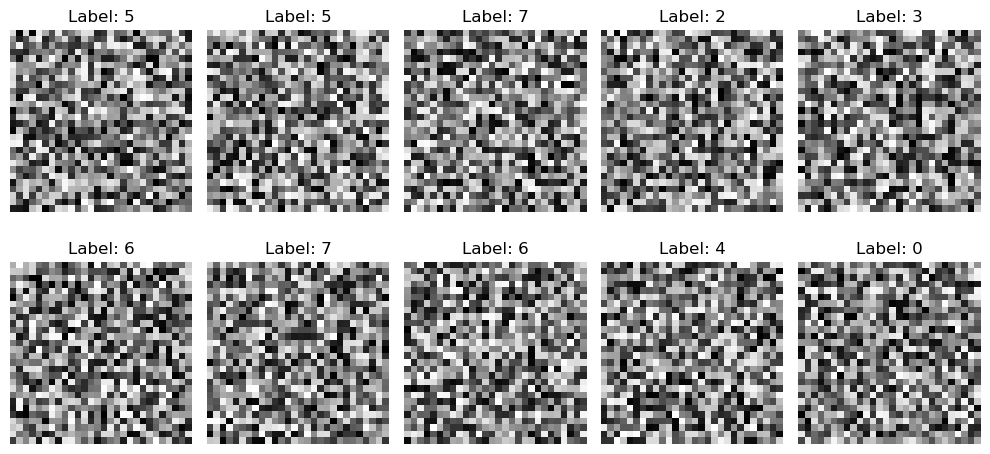

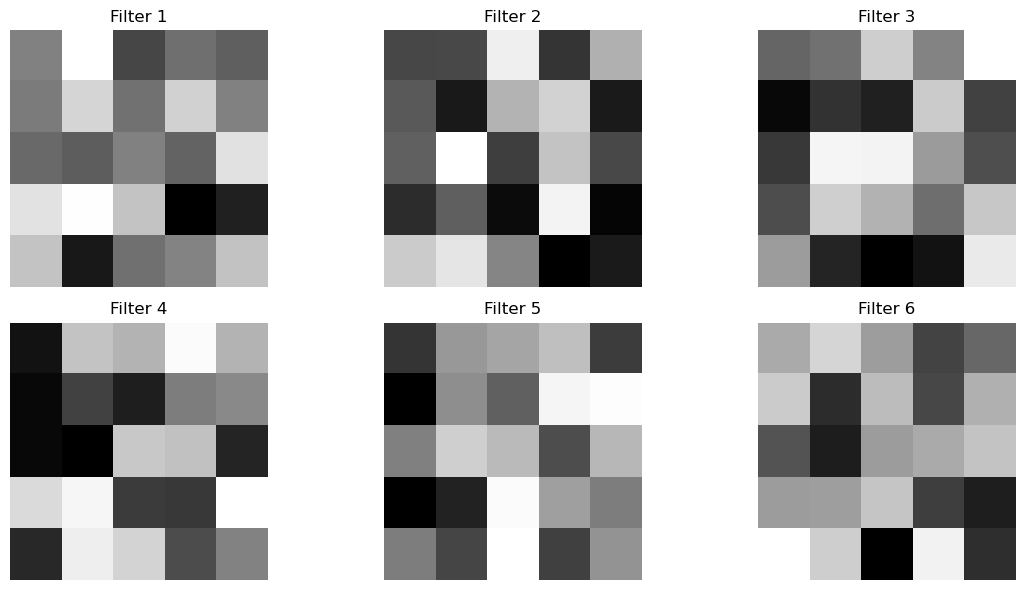

7/7 [==============================] - 1s 30ms/step


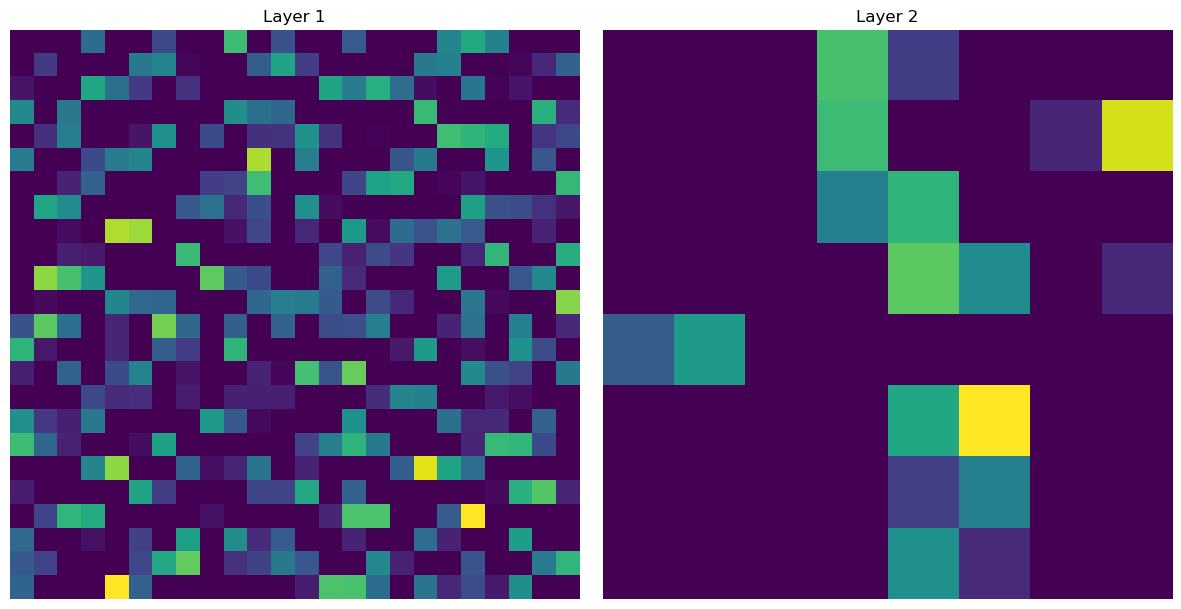

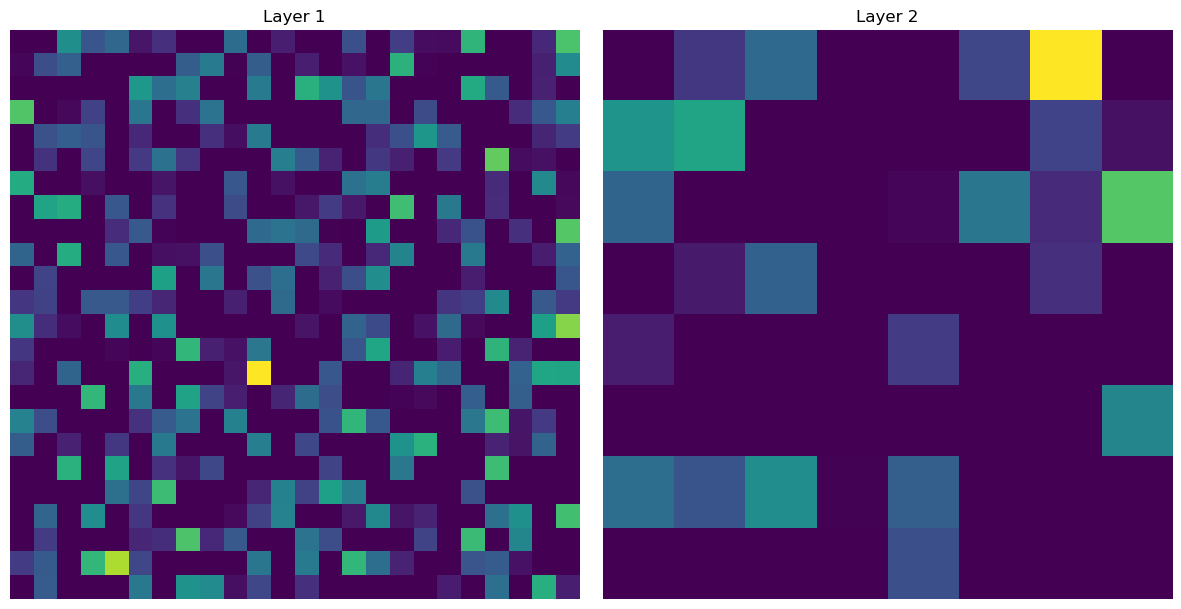

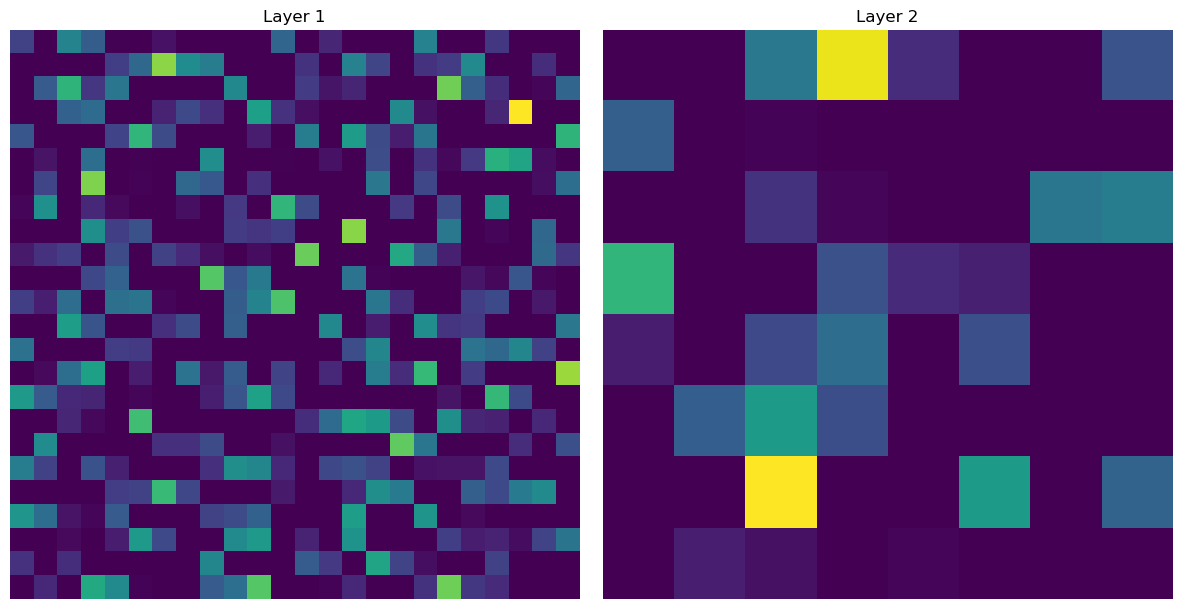

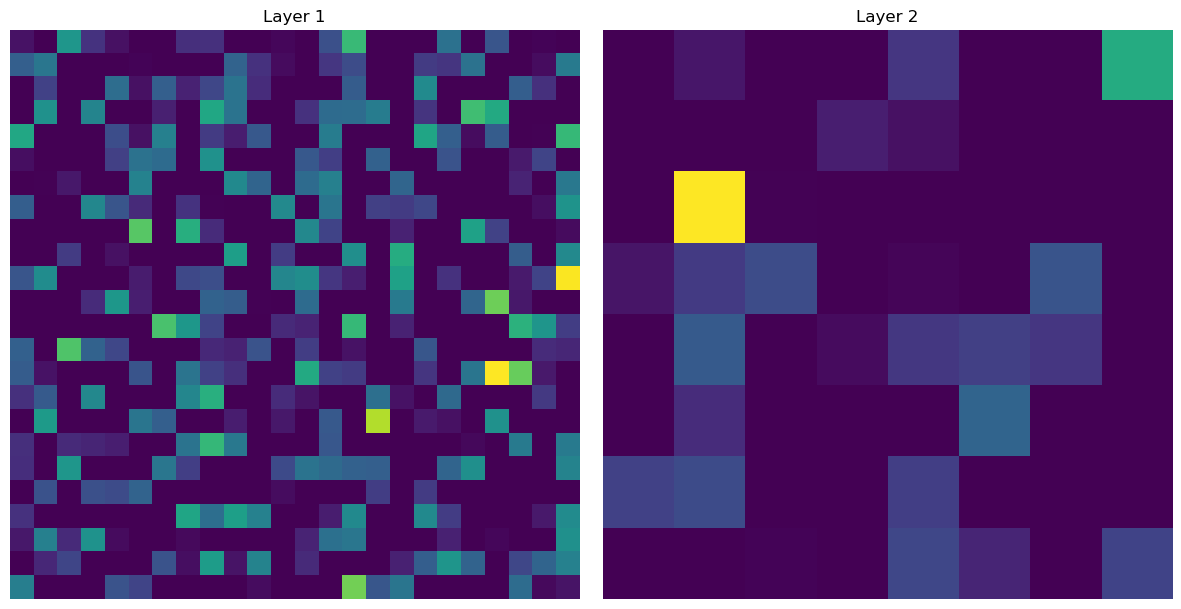

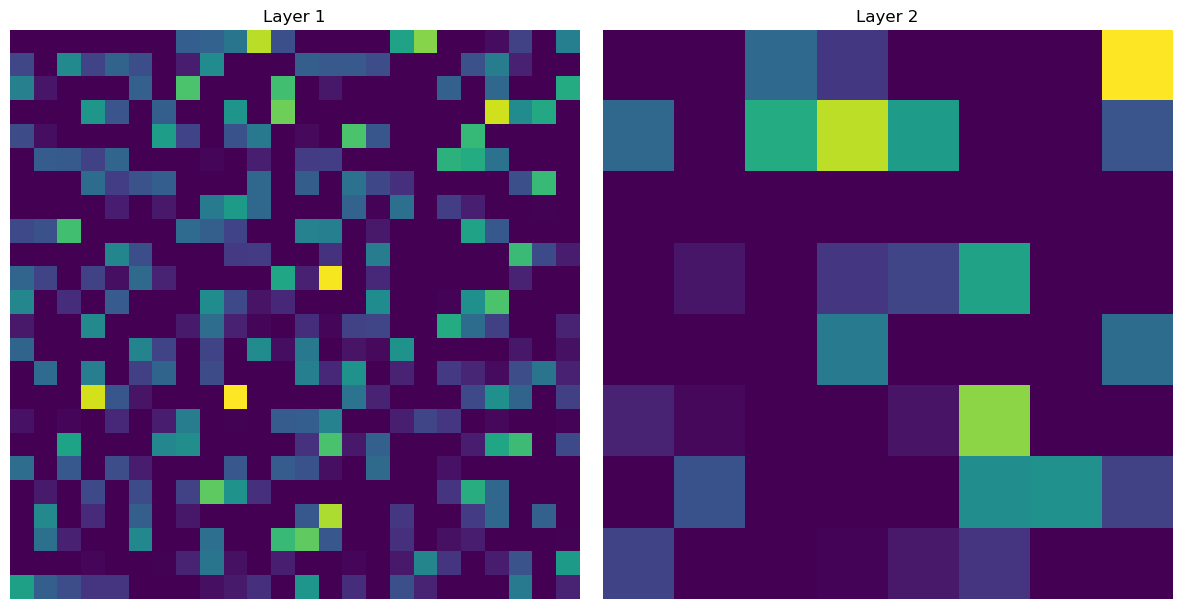

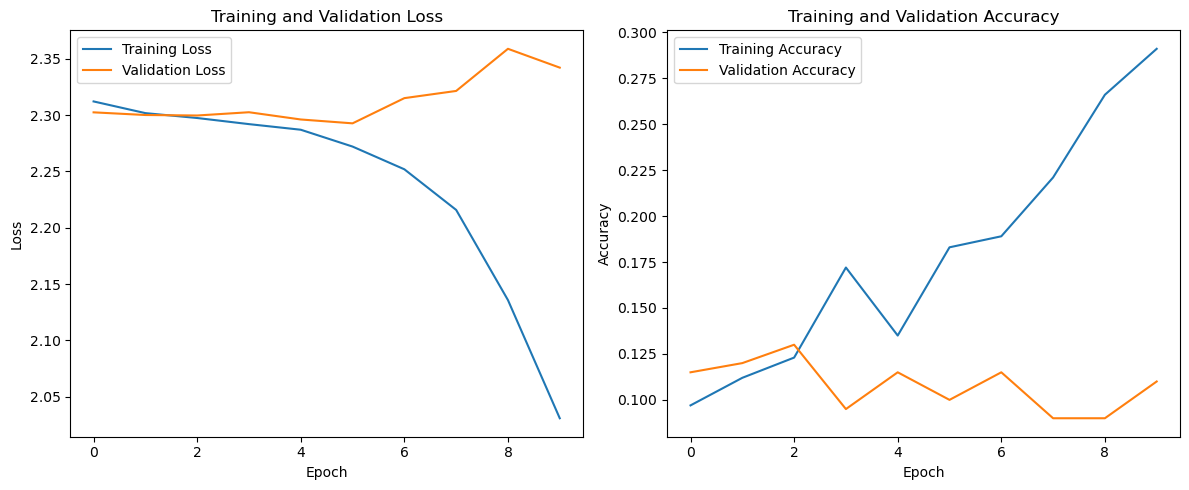

7/7 [==============================] - 0s 19ms/step


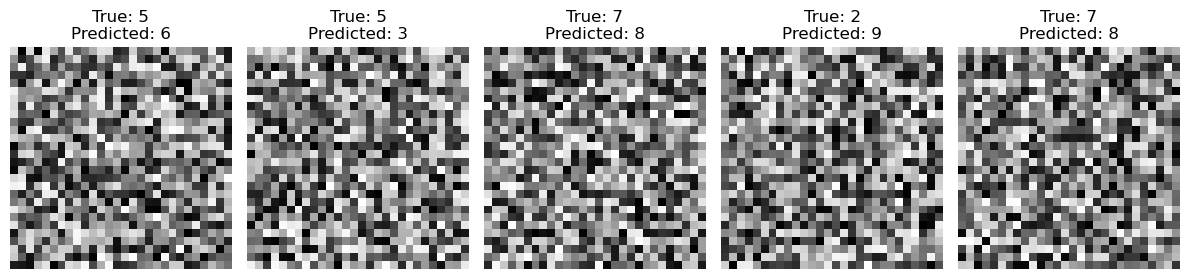

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Function to build LeNet model
def build_model(input_shape):
    model = models.Sequential([
        layers.Reshape((input_shape[0], input_shape[1], 1), input_shape=input_shape),  # Add channel dimension
        layers.Conv2D(6, kernel_size=(5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Function to generate synthetic images
def generate_synthetic_images(num_images=100, image_shape=(28, 28), num_classes=10):
    images = np.zeros((num_images, *image_shape))
    labels = np.random.randint(0, num_classes, num_images)
    for i in range(num_images):
        image = np.random.rand(*image_shape)
        images[i] = image
    return images, labels

# Function to plot random sample images
def plot_sample_images(X, y, num_samples=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to plot random filter visualizations
def plot_filter_visualizations(model, num_filters=6):
    plt.figure(figsize=(12, 6))
    for i in range(num_filters):
        filter_weights = model.layers[1].get_weights()[0][:, :, :, i]
        plt.subplot(2, 3, i + 1)
        plt.imshow(filter_weights[:,:,0], cmap='gray')
        plt.title(f'Filter {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to plot random feature maps
def plot_feature_maps(model, X, num_images=5):
    conv_layers = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
    activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=conv_layers)
    activations = activation_model.predict(X)
    for i in range(num_images):
        plt.figure(figsize=(12, 6))
        for j in range(len(conv_layers)):
            plt.subplot(1, len(conv_layers), j + 1)
            plt.imshow(activations[j][i, :, :, 0], cmap='viridis')
            plt.title(f'Layer {j+1}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot random misclassified samples
def plot_misclassified_samples(model, X, y, num_samples=5):
    predictions = model.predict(X)
    misclassified_indices = np.where(np.argmax(predictions, axis=1) != y)[0]
    misclassified_samples = X[misclassified_indices]
    misclassified_labels = np.argmax(predictions[misclassified_indices], axis=1)
    true_labels = y[misclassified_indices]
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(misclassified_samples[i], cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPredicted: {misclassified_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate synthetic images
X_train, y_train = generate_synthetic_images(num_images=1000)
X_val, y_val = generate_synthetic_images(num_images=200)
X_test, y_test = generate_synthetic_images(num_images=200)

# Build LeNet model
input_shape = X_train.shape[1:]
model = build_model(input_shape)
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Plot sample images
plot_sample_images(X_test, y_test)

# Plot filter visualizations
plot_filter_visualizations(model)

# Plot feature maps
plot_feature_maps(model, X_test)

# Plot training history
plot_training_history(history)

# Plot misclassified samples
plot_misclassified_samples(model, X_test, y_test)
